In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [3]:
drive_root = '..'
TRAIN_DIR = f"{drive_root}/input/petfinder-pawpularity-score/train"
TEST_DIR = f"{drive_root}/input/petfinder-pawpularity-score/test"
DENSE_FEATURES = [
    'Subject Focus',
    'Eyes',
    'Face',
    'Near',
    'Action',
    'Accessory',
    'Group',
    'Collage',
    'Human',
    'Occlusion',
    'Info',
    'Blur',
]
df_train = pd.read_csv(f"{drive_root}/input/petfinder-pawpularity-score/train.csv")
df_test = pd.read_csv(f"{drive_root}/input/petfinder-pawpularity-score/test.csv")
df_train['filepath'] = df_train.Id.apply(lambda x :f"{TRAIN_DIR}/{x}.jpg" )
df_test['filepath'] = df_test.Id.apply(lambda x :f"{TEST_DIR}/{x}.jpg" )

In [8]:
seed = 2021
model_code = f'swin_{seed}'
result_path = f'../output/weights/final_weights/embed_features & 2nd_head/{model_code}_2nd_head/'
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
id_lst = []
exec(f'{model_code}_org_lst=[]')
exec(f'{model_code}_elas_lst=[]')
exec(f'{model_code}_svr_lst=[]')
exec(f'{model_code}_sr_lst=[]')
exec(f'{model_code}_qr_lst=[]')
exec(f'{model_code}_by_lst=[]')
exec(f'{model_code}_bi_lst=[]')


for fold, (train_idx, val_idx) in enumerate(skf.split(df_train["Id"], df_train["Pawpularity"])):
    val_df = df_train.loc[val_idx].reset_index(drop=True)
    #org_predict = np.load(f'./prediction/{model_code}/org/val_predicts_fold{fold}.npy')
    elas_predict = np.load(f'{result_path}elas_head/val_elas_preds_fold{fold}.npy')
    svr_predict = np.load(f'{result_path}svr_head/val_svr_preds_fold{fold}.npy')
    sr_predict =  np.load(f'{result_path}simple_head/val_Simple_predicts{fold}.npy')
    qr_predict =  np.load(f'{result_path}qr_head/val_QR_predicts{fold}.npy')
    by_predict =  np.load(f'{result_path}by_head/val_Bayes_predicts{fold}.npy')
    bi_predict = np.load(f'{result_path}binary_head/val_binary_predicts{fold}.npy')
    id_lst.extend(val_df['Id'].tolist())
    #exec(f'{model_code}_org_lst.extend(org_predict.tolist())')
    exec(f'{model_code}_elas_lst.extend(elas_predict.tolist())')
    exec(f'{model_code}_svr_lst.extend(svr_predict.tolist())')
    exec(f'{model_code}_sr_lst.extend(sr_predict.tolist())')
    exec(f'{model_code}_qr_lst.extend(qr_predict.tolist())')
    exec(f'{model_code}_by_lst.extend(by_predict.tolist())')
    exec(f'{model_code}_bi_lst.extend(bi_predict.tolist())')

swin_2021_df = pd.DataFrame({'Id':id_lst, '2021_elas':swin_2021_elas_lst, '2021_svr':swin_2021_svr_lst, '2021_sr':swin_2021_sr_lst, '2021_qr':swin_2021_qr_lst, '2021_by':swin_2021_by_lst, '2021_bi':swin_2021_bi_lst})

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [9]:
swin_2021_df

,Id,2021_elas,2021_svr,2021_sr,2021_qr,2021_by,2021_bi
0,006cda7fec46a527f9f627f4722a2304,32.784363,22.553864,30.002338,30.615643,29.552940,False
1,00838b02764e8d37edde39ed18693427,33.322876,24.652695,31.495823,32.135403,30.773914,False
2,00d560ebe5e1b2450eb530a2c96d08a3,47.946220,54.987637,53.957947,52.327629,56.469742,False
3,00e75d192cd4b26798933a817b04ccd9,45.578629,48.825420,51.229626,49.689442,52.946251,False
4,00e83013f21b99cd7edb1d4e545f6579,37.435078,36.654896,37.446426,36.940777,37.542610,False
...,...,...,...,...,...,...,...
9907,fe5ff849e2e36859d2270cf6da95628b,39.031456,35.569244,36.542469,36.977203,36.804497,False
9908,fe80fffa8bab0dafba63a9b4f07b557a,28.402105,21.747021,25.962845,27.691082,25.715237,False
9909,fedb56afb73e703dbcad66406943b45f,53.973728,78.133957,73.141029,77.339149,77.706573,False
9910,feec2ab3566fd40b167c9b3736d1129c,26.026653,22.464670,23.236481,25.320240,24.011360,False


In [97]:
seed = 2022
model_code = f'swin_{seed}'
result_path = f'../output/weights/final_weights/{model_code}_2nd_head/'
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
id_lst = []
exec(f'{model_code}_org_lst=[]')
exec(f'{model_code}_elas_lst=[]')
exec(f'{model_code}_svr_lst=[]')
exec(f'{model_code}_sr_lst=[]')
exec(f'{model_code}_qr_lst=[]')
exec(f'{model_code}_by_lst=[]')
exec(f'{model_code}_bi_lst=[]')


for fold, (train_idx, val_idx) in enumerate(skf.split(df_train["Id"], df_train["Pawpularity"])):
    val_df = df_train.loc[val_idx].reset_index(drop=True)
    #org_predict = np.load(f'./prediction/{model_code}/org/val_predicts{fold}.npy')
    elas_predict = np.load(f'{result_path}elas_head/val_elas_preds_fold{fold}.npy')
    svr_predict = np.load(f'{result_path}svr_head/val_svr_preds_fold{fold}.npy')
    sr_predict =  np.load(f'{result_path}simple_head/val_Simple_predicts{fold}.npy')
    qr_predict =  np.load(f'{result_path}qr_head/val_QR_predicts{fold}.npy')
    by_predict =  np.load(f'{result_path}by_head/val_Bayes_predicts{fold}.npy')
    #bi_predict = np.load(f'{result_path}binary_head/val_binary_predicts{fold}.npy')
    id_lst.extend(val_df['Id'].tolist())
    exec(f'{model_code}_org_lst.extend(org_predict.tolist())')
    exec(f'{model_code}_elas_lst.extend(elas_predict.tolist())')
    exec(f'{model_code}_svr_lst.extend(svr_predict.tolist())')
    exec(f'{model_code}_sr_lst.extend(sr_predict.tolist())')
    exec(f'{model_code}_qr_lst.extend(qr_predict.tolist())')
    exec(f'{model_code}_by_lst.extend(by_predict.tolist())')
#     exec(f'{model_code}_bi_lst.extend(bi_predict.tolist())')

swin_2022_df = pd.DataFrame({'Id':id_lst, '2022_elas':swin_2022_elas_lst, '2022_svr':swin_2022_svr_lst, '2022_sr':swin_2022_sr_lst, '2022_qr':swin_2022_qr_lst, '2022_by':swin_2022_by_lst})
# swin_2022_df = pd.DataFrame({'Id':id_lst, '2022_org':swin_2022_org_lst, '2022_elas':swin_2022_elas_lst, '2022_svr':swin_2022_svr_lst})

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [98]:
seed = 2023
model_code = f'swin_{seed}'
result_path = f'../output/weights/final_weights/{model_code}_2nd_head/'
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
id_lst = []
exec(f'{model_code}_org_lst=[]')
exec(f'{model_code}_elas_lst=[]')
exec(f'{model_code}_svr_lst=[]')
exec(f'{model_code}_sr_lst=[]')
exec(f'{model_code}_qr_lst=[]')
exec(f'{model_code}_by_lst=[]')
exec(f'{model_code}_bi_lst=[]')


for fold, (train_idx, val_idx) in enumerate(skf.split(df_train["Id"], df_train["Pawpularity"])):
    val_df = df_train.loc[val_idx].reset_index(drop=True)
    org_predict = np.load(f'./prediction/{model_code}/org/val_predicts{fold}.npy')
    elas_predict = np.load(f'{result_path}elas_head/val_elas_preds_fold{fold}.npy')
    svr_predict = np.load(f'{result_path}svr_head/val_svr_preds_fold{fold}.npy')
    sr_predict =  np.load(f'{result_path}simple_head/val_Simple_predicts{fold}.npy')
    qr_predict =  np.load(f'{result_path}qr_head/val_QR_predicts{fold}.npy')
    by_predict =  np.load(f'{result_path}by_head/val_Bayes_predicts{fold}.npy')
    #bi_predict = np.load(f'{result_path}binary_head/val_binary_predicts{fold}.npy')
    id_lst.extend(val_df['Id'].tolist())
    exec(f'{model_code}_org_lst.extend(org_predict.tolist())')
    exec(f'{model_code}_elas_lst.extend(elas_predict.tolist())')
    exec(f'{model_code}_svr_lst.extend(svr_predict.tolist())')
    exec(f'{model_code}_sr_lst.extend(sr_predict.tolist())')
    exec(f'{model_code}_qr_lst.extend(qr_predict.tolist())')
    exec(f'{model_code}_by_lst.extend(by_predict.tolist())')
    #exec(f'{model_code}_bi_lst.extend(bi_predict.tolist())')

swin_2023_df = pd.DataFrame({'Id':id_lst, '2023_org':swin_2023_org_lst, '2023_elas':swin_2023_elas_lst, '2023_svr':swin_2023_svr_lst, '2023_sr':swin_2023_sr_lst, '2023_qr':swin_2023_qr_lst, '2023_by':swin_2023_by_lst})
# swin_2023_df = pd.DataFrame({'Id':id_lst, '2023_org':swin_2023_org_lst, '2023_elas':swin_2023_elas_lst, '2023_svr':swin_2023_svr_lst})

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [99]:
seed = 2025
model_code = f'swin_{seed}'
result_path = f'../output/weights/final_weights/{model_code}_2nd_head/'
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
id_lst = []
exec(f'{model_code}_org_lst=[]')
exec(f'{model_code}_elas_lst=[]')
exec(f'{model_code}_svr_lst=[]')
exec(f'{model_code}_sr_lst=[]')
exec(f'{model_code}_qr_lst=[]')
exec(f'{model_code}_by_lst=[]')
exec(f'{model_code}_bi_lst=[]')


for fold, (train_idx, val_idx) in enumerate(skf.split(df_train["Id"], df_train["Pawpularity"])):
    val_df = df_train.loc[val_idx].reset_index(drop=True)
    org_predict = np.load(f'./prediction/{model_code}/org/val_predicts_fold{fold}.npy')
    elas_predict = np.load(f'{result_path}elas_head/val_elas_preds_fold{fold}.npy')
    svr_predict = np.load(f'{result_path}svr_head/val_svr_preds_fold{fold}.npy')
    sr_predict =  np.load(f'{result_path}simple_head/val_Simple_predicts{fold}.npy')
    qr_predict =  np.load(f'{result_path}qr_head/val_QR_predicts{fold}.npy')
    by_predict =  np.load(f'{result_path}by_head/val_Bayes_predicts{fold}.npy')
    bi_predict = np.load(f'{result_path}binary_head/val_binary_predicts{fold}.npy')
    id_lst.extend(val_df['Id'].tolist())
    exec(f'{model_code}_org_lst.extend(org_predict.tolist())')
    exec(f'{model_code}_elas_lst.extend(elas_predict.tolist())')
    exec(f'{model_code}_svr_lst.extend(svr_predict.tolist())')
    exec(f'{model_code}_sr_lst.extend(sr_predict.tolist())')
    exec(f'{model_code}_qr_lst.extend(qr_predict.tolist())')
    exec(f'{model_code}_by_lst.extend(by_predict.tolist())')
    exec(f'{model_code}_bi_lst.extend(bi_predict.tolist())')

swin_2025_df = pd.DataFrame({'Id':id_lst, '2025_org':swin_2025_org_lst, '2025_elas':swin_2025_elas_lst, '2025_svr':swin_2025_svr_lst, '2025_sr':swin_2025_sr_lst, '2025_qr':swin_2025_qr_lst, '2025_by':swin_2025_by_lst, '2025_bi':swin_2025_bi_lst})

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [100]:
seed = 2026
model_code = f'cait_{seed}'
result_path = f'../output/weights/final_weights/{model_code}_2nd_head/'
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
id_lst = []
exec(f'{model_code}_org_lst=[]')
exec(f'{model_code}_elas_lst=[]')
exec(f'{model_code}_svr_lst=[]')
exec(f'{model_code}_sr_lst=[]')
exec(f'{model_code}_qr_lst=[]')
exec(f'{model_code}_by_lst=[]')
exec(f'{model_code}_bi_lst=[]')


for fold, (train_idx, val_idx) in enumerate(skf.split(df_train["Id"], df_train["Pawpularity"])):
    val_df = df_train.loc[val_idx].reset_index(drop=True)
    org_predict = np.load(f'./prediction/{model_code}/org/val_predicts_fold{fold}.npy')
    elas_predict = np.load(f'{result_path}elas_head/val_elas_preds_fold{fold}.npy')
    svr_predict = np.load(f'{result_path}svr_head/val_svr_preds_fold{fold}.npy')
    sr_predict =  np.load(f'{result_path}simple_head/val_Simple_predicts{fold}.npy')
    qr_predict =  np.load(f'{result_path}qr_head/val_QR_predicts{fold}.npy')
    by_predict =  np.load(f'{result_path}by_head/val_Bayes_predicts{fold}.npy')
    bi_predict = np.load(f'{result_path}binary_head/val_binary_predicts{fold}.npy')
    id_lst.extend(val_df['Id'].tolist())
    exec(f'{model_code}_org_lst.extend(org_predict.tolist())')
    exec(f'{model_code}_elas_lst.extend(elas_predict.tolist())')
    exec(f'{model_code}_svr_lst.extend(svr_predict.tolist())')
    exec(f'{model_code}_sr_lst.extend(sr_predict.tolist())')
    exec(f'{model_code}_qr_lst.extend(qr_predict.tolist())')
    exec(f'{model_code}_by_lst.extend(by_predict.tolist())')
    exec(f'{model_code}_bi_lst.extend(bi_predict.tolist())')

cait_2026_df = pd.DataFrame({'Id':id_lst, '2026_org':cait_2026_org_lst, '2026_elas':cait_2026_elas_lst, '2026_svr':cait_2026_svr_lst, '2026_sr':cait_2026_sr_lst, '2026_qr':cait_2026_qr_lst, '2026_by':cait_2026_by_lst, '2026_bi':cait_2026_bi_lst})

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [101]:
pred_df = pd.merge(left = swin_2021_df , right = swin_2022_df, how = "inner", on = "Id")
pred_df = pd.merge(left = pred_df , right = swin_2023_df, how = "inner", on = "Id")
pred_df = pd.merge(left = pred_df , right = swin_2025_df, how = "inner", on = "Id")
pred_df = pd.merge(left = pred_df , right = cait_2026_df, how = "inner", on = "Id")

In [11]:
answer_df = pd.DataFrame({'Id' : df_train['Id'], 'answer' : df_train['Pawpularity']})

In [12]:
#final_df = pd.merge(left = answer_df , right = pred_df, how = "inner", on = "Id")
final_df = pd.merge(left = answer_df , right = swin_2021_df, how = "inner", on = "Id")

In [13]:
final_df.shape

(9912, 8)

In [14]:
from sklearn.metrics import mean_squared_error

pred_cols = final_df.columns[2:]
for col in pred_cols:
    pred = final_df[col]
    answer = final_df['answer']
    score = mean_squared_error(answer, pred)**0.5
    print(f'{col} score : {score:.4f}')



2021_elas score : 17.7199
2021_svr score : 17.6974
2021_sr score : 17.2483
2021_qr score : 17.3533
2021_by score : 17.2843
2021_bi score : 43.1650


In [16]:
ens_pred_0 = (final_df['2021_elas'] + final_df['2021_svr']  + final_df['2021_sr'] + final_df['2021_by'] + final_df['2021_qr']) / 5.
score = mean_squared_error(answer, ens_pred_0)**0.5
print(f'original ensemble score : {score:.4f}') 

original ensemble score : 17.2240


In [12]:
final_df

,Id,answer,2021_org,2021_elas,2021_svr,2021_sr,2021_qr,2021_by,2021_bi,2022_org,...,2025_qr,2025_by,2025_bi,2026_org,2026_elas,2026_svr,2026_sr,2026_qr,2026_by,2026_bi
0,0007de18844b0dbbb5e1f607da0606e0,63,50.264412,46.881035,52.556423,51.958691,51.304298,51.427704,False,49.663528,...,48.020218,48.450264,False,50.561424,50.318722,63.362129,54.595970,55.345337,55.884056,False
1,0009c66b9439883ba2750fb825e1d7db,42,46.371140,43.515343,44.773918,45.467339,42.388294,44.691162,False,46.263962,...,48.376640,48.487076,False,40.595482,43.191414,38.399265,44.155422,42.352463,44.061043,False
2,0013fd999caf9a3efe1352ca1b0d937e,28,39.563145,42.167603,33.594528,40.123505,38.027458,37.437073,False,38.911697,...,39.941864,41.557976,False,31.726074,36.853706,31.681709,36.189163,34.086868,34.540051,False
3,0018df346ac9c1d8413cfcc888ca8246,15,65.116127,56.978245,75.548248,70.248993,74.075348,67.142876,True,57.254402,...,60.365112,57.821667,False,55.734383,51.124466,56.790333,54.034592,60.137524,56.013607,False
4,001dc955e10590d3ca4673f034feeef2,72,47.531494,43.892235,49.145515,49.453369,49.163174,44.637566,False,44.072258,...,48.036255,44.902103,False,46.865158,46.287949,52.079769,51.126160,52.821369,54.919159,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,15,22.319740,26.487545,14.509028,23.471291,26.731678,22.570940,False,26.850883,...,25.144611,25.299936,False,25.201391,30.984123,15.668083,24.882383,27.896954,24.875902,False
9908,ffcc8532d76436fc79e50eb2e5238e45,70,29.887276,35.193298,25.114605,33.337479,30.228403,32.327183,False,38.134369,...,33.094212,31.675648,False,30.802023,36.707413,32.461620,34.523975,33.645344,31.805538,False
9909,ffdf2e8673a1da6fb80342fa3b119a20,20,26.741474,30.546419,30.605370,28.941940,31.684917,28.804199,False,28.110104,...,27.476896,26.840141,False,27.213511,32.114563,19.437393,29.679798,30.513903,27.525511,False
9910,fff19e2ce11718548fa1c5d039a5192a,20,30.870129,37.987396,31.782473,32.142033,33.780701,35.236729,False,34.662926,...,41.974777,44.662407,False,40.514267,40.141335,32.376526,36.985977,35.731079,36.518471,False


In [107]:
ens_pred_0 = (final_df['2021_org'] + final_df['2021_elas'] + final_df['2021_svr']  + final_df['2022_elas'] + final_df['2022_svr'] + final_df['2025_org']  + final_df['2025_elas'] + final_df['2025_svr'] + final_df['2026_org'] + final_df['2026_elas'] + final_df['2026_svr']) / 11.
score = mean_squared_error(answer, ens_pred_0)**0.5
print(f'original ensemble score : {score:.4f}') 

original ensemble score : 17.1317


In [108]:
ens_pred_1 = (final_df['2021_sr'] + final_df['2021_qr'] + final_df['2021_by'] + final_df['2021_elas'] + final_df['2021_svr']) / 5.
#ens_pred_1 = (final_df['2021_sr'] + final_df['2021_qr'] + final_df['2021_by']) / 5.
score = mean_squared_error(answer, ens_pred_1)**0.5
print(f'2021 ensemble score : {score:.4f}') 

2021 ensemble score : 17.2240


In [109]:
ens_pred_2 = (final_df['2022_sr'] + final_df['2022_qr'] + final_df['2022_by'] + final_df['2022_elas'] + final_df['2022_svr']) / 5.
score = mean_squared_error(answer, ens_pred_2)**0.5
print(f'2022 ensemble score : {score:.4f}') 

2022 ensemble score : 17.4409


In [110]:
ens_pred_3 = (final_df['2025_sr'] + final_df['2025_qr'] + final_df['2025_by']+ final_df['2025_elas'] + final_df['2025_svr']) / 5.
score = mean_squared_error(answer, ens_pred_3)**0.5
print(f'2025 ensemble score : {score:.4f}') 

2025 ensemble score : 17.2690


In [111]:
ens_pred_4 = (final_df['2026_sr'] + final_df['2026_qr'] + final_df['2026_by'] + final_df['2026_elas'] + final_df['2026_svr']) / 5.
score = mean_squared_error(answer, ens_pred_4)**0.5
print(f'2026 ensemble score : {score:.4f}') 

2026 ensemble score : 17.3283


In [112]:
ens_pred = (ens_pred_1 + ens_pred_2 + ens_pred_3 + ens_pred_4) / 4.
score = mean_squared_error(answer, ens_pred)**0.5
print(f'total score : {score:.4f}') 

total score : 17.1001


In [113]:
ens_pred = (final_df['2021_sr'] + final_df['2021_qr'] + final_df['2021_by'] + final_df['2021_elas'] + final_df['2021_svr'] + final_df['2022_sr'] + final_df['2022_qr'] + final_df['2022_by'] + final_df['2025_sr'] + final_df['2025_qr'] + final_df['2025_by'] + final_df['2026_sr'] + final_df['2026_qr'] + final_df['2026_by'] ) / 14.
score = mean_squared_error(answer, ens_pred)**0.5
print(f'total score : {score:.4f}') 

total score : 17.0955


# Add binary head

In [38]:
ens_pred_1 = (final_df['2021_sr'] + final_df['2021_qr'] + final_df['2021_by']+ final_df['2021_elas'] + final_df['2021_svr']) / 5.
ens_pred_1[final_df['2021_bi']] = 100
score = mean_squared_error(answer, ens_pred_1)**0.5
print(f'2021 ensemble score : {score:.4f}') 

2021 ensemble score : 19.8097


In [39]:
ens_pred_2 = (final_df['2022_sr'] + final_df['2022_qr'] + final_df['2022_by'] + final_df['2022_elas'] + final_df['2022_svr']) / 5.
ens_pred_2[final_df['2022_bi']] = 100
score = mean_squared_error(answer, ens_pred_2)**0.5
print(f'2022 ensemble score : {score:.4f}') 

KeyError: '2022_bi'

In [40]:
ens_pred_3 = (final_df['2025_sr'] + final_df['2025_qr'] + final_df['2025_by']+ final_df['2025_elas'] + final_df['2025_svr']) / 5.
ens_pred_3[final_df['2025_bi']] = 100
score = mean_squared_error(answer, ens_pred_3)**0.5
print(f'2025 ensemble score : {score:.4f}') 

2025 ensemble score : 18.5126


In [41]:
ens_pred_4 = (final_df['2026_sr'] + final_df['2026_qr'] + final_df['2026_by'] + final_df['2026_elas'] + final_df['2026_svr']) / 5.
ens_pred_4[final_df['2026_bi']] = 100
score = mean_squared_error(answer, ens_pred_4)**0.5
print(f'2026 ensemble score : {score:.4f}') 

2026 ensemble score : 18.1284


In [24]:
ens_pred = (ens_pred_1 + ens_pred_2 + ens_pred_3 + ens_pred_4) / 4.
score = mean_squared_error(answer, ens_pred)**0.5
print(f'total score : {score:.4f}') 

total score : 17.8347


# Strict binary head

In [42]:
ens_pred_1 = (final_df['2021_sr'] + final_df['2021_qr'] + final_df['2021_by']) / 3.
score = mean_squared_error(answer, ens_pred_1)**0.5
print(f'2021 ensemble score : {score:.4f}') 
ens_pred_2 = (final_df['2022_sr'] + final_df['2022_qr'] + final_df['2022_by']) / 3.
score = mean_squared_error(answer, ens_pred_2)**0.5
print(f'2022 ensemble score : {score:.4f}') 
ens_pred_3 = (final_df['2025_sr'] + final_df['2025_qr'] + final_df['2025_by']) / 3.
score = mean_squared_error(answer, ens_pred_3)**0.5
print(f'2025 ensemble score : {score:.4f}') 
ens_pred_4 = (final_df['2026_sr'] + final_df['2026_qr'] + final_df['2026_by']) / 3.
score = mean_squared_error(answer, ens_pred_4)**0.5
print(f'2026 ensemble score : {score:.4f}') 

2021 ensemble score : 17.2397
2022 ensemble score : 17.3542
2025 ensemble score : 17.2904
2026 ensemble score : 17.3501


In [60]:
ens_pred = (ens_pred_1 + ens_pred_2 + ens_pred_3 + ens_pred_4) / 4.
score = mean_squared_error(answer, ens_pred)**0.5
print(f'total score : {score:.4f}') 
hud = final_df['2025_bi'] & final_df['2021_bi'] & final_df['2026_bi'] & (ens_pred > 82)
ens_pred[hud] = 100
score = mean_squared_error(answer, ens_pred)**0.5
print(f'total adjuisted score : {score:.4f}') 

total score : 17.0849
total adjuisted score : 17.0782


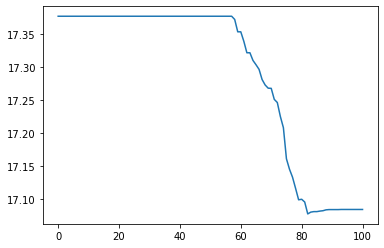

In [62]:
import matplotlib.pyplot as plt

scores = []
for i in range(101):
    ens_pred = (ens_pred_1 + ens_pred_2 + ens_pred_3 + ens_pred_4) / 4.
    hud = final_df['2025_bi'] & final_df['2021_bi'] & final_df['2026_bi'] & (ens_pred > i)
    ens_pred[hud] = 100
    score = mean_squared_error(answer, ens_pred)**0.5
    #print(f'2026 ensemble score : {score:.4f}') 
    scores.append(score)
plt.plot(scores)

In [28]:
temp_df = pd.DataFrame({'answer':final_df[hud].answer, 'pred':ens_pred[hud]})

In [29]:
temp_df

,answer,pred
1424,66,100.0
1586,100,100.0
2452,100,100.0
3149,100,100.0
3754,97,100.0
3974,100,100.0
4814,60,100.0
5221,80,100.0
5265,100,100.0
5329,100,100.0


# Find optimal combination

In [115]:
pred_list = final_df.columns[2:].tolist()

In [31]:
del pred_list[pred_list.index('2021_bi')]

In [116]:
pred_list

['2021_org',
 '2021_elas',
 '2021_svr',
 '2021_sr',
 '2021_qr',
 '2021_by',
 '2021_bi',
 '2022_elas',
 '2022_svr',
 '2022_sr',
 '2022_qr',
 '2022_by',
 '2023_org',
 '2023_elas',
 '2023_svr',
 '2023_sr',
 '2023_qr',
 '2023_by',
 '2025_org',
 '2025_elas',
 '2025_svr',
 '2025_sr',
 '2025_qr',
 '2025_by',
 '2025_bi',
 '2026_org',
 '2026_elas',
 '2026_svr',
 '2026_sr',
 '2026_qr',
 '2026_by',
 '2026_bi']

In [114]:
from itertools import combinations

debug = False
pred_list = final_df.columns[2:].tolist()
del pred_list[pred_list.index('2021_bi')]
# del pred_list[pred_list.index('2022_bi')]
del pred_list[pred_list.index('2025_bi')]
del pred_list[pred_list.index('2026_bi')]
pred_list = tuple(pred_list)

cv_min_score = 10e+2

for i in range(1, len(pred_list)+1):
    
    comb = list(combinations(pred_list, i))
    
    for c in comb:
        temp_df = final_df[list(c)].values
        ensemble_predicts = np.mean(temp_df, axis=1)
#         ensemble_predicts = np.zeros(len(final_df))
#         for item in c:
#             ensemble_predicts += final_df[item].to_numpy()
#         ensemble_predicts = ensemble_predicts/len(c)
        ens_score = mean_squared_error(final_df['answer'],ensemble_predicts)**0.5
            
        if ens_score < cv_min_score:
            min_comb = c
            cv_min_score = ens_score
        if debug:
            print(c)
            print(f'cv score : {ens_score}')
            print('------------')
            
        print(f'min combination : {min_comb}, score : {cv_min_score}, current_score : {ens_score}', end='\r')

KeyboardInterrupt: 